In [1002]:
import pandas as pd

In [1003]:
data = pd.read_csv('Churn_Modelling.csv')

In [1004]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1005]:
data.shape

(10000, 14)

In [1006]:
print("no of rows:", data.shape[0])
print("no of columns:", data.shape[1])

no of rows: 10000
no of columns: 14


In [1007]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1008]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [1009]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [1010]:
#to get numeric and categorical columns
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [1011]:
data.columns
#to drop irrelevant features for predciction



Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [1012]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [1013]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1014]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [1015]:
#encoding categorical data
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [1016]:
data = pd.get_dummies(data,drop_first=True)
data[['Geography_Germany', 'Geography_Spain']] = data[['Geography_Germany', 'Geography_Spain']].astype(int)


In [1017]:
data.head() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,False


In [1018]:
#not handling imbalance dataset as of now

data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [1019]:
import seaborn as sns


<Axes: xlabel='Exited', ylabel='count'>

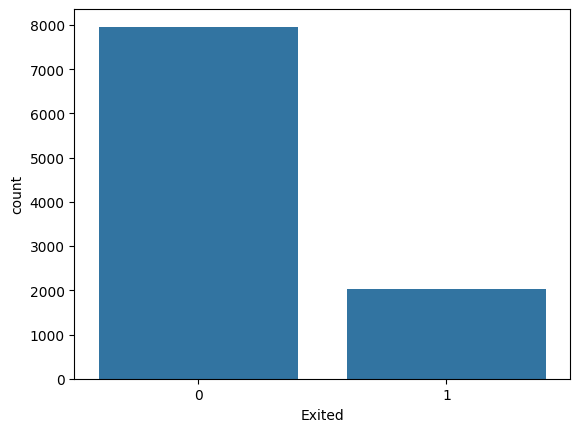

In [1020]:
sns.countplot(x='Exited', data=data)
#here o is person not leaving company and 1 is person leaving the company

In [1021]:
X = data.drop('Exited', axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,False
2,502,42,8,159660.80,3,1,0,113931.57,0,0,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,False
4,850,43,2,125510.82,1,1,1,79084.10,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,True
9997,709,36,7,0.00,1,0,1,42085.58,0,0,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,True


In [1022]:
y = data['Exited']

In [1023]:
#handling imbaalnced dataset
from imblearn.over_sampling import SMOTE
#SMOTE is a technique to handle imbalanced datasets by generating synthetic samples for the minority class.
X_res, y_res=SMOTE().fit_resample(X, y)
y_res.value_counts()

#if we need to do undersampling but its not required here
#from imblearn.under_sampling import RandomUnderSampler
#X_res, y_res = RandomUnderSampler().fit_resample(X, y)

Exited
1    7963
0    7963
Name: count, dtype: int64

In [1024]:
#splitting data into train and test
from sklearn.model_selection import train_test_split


In [1025]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)
#why stratify=y? to maintain the same distribution of target variable in train and test dataset as in original dataset
# If your target variable y has a class imbalance:
# - 80% of samples are class 0
# - 20% are class 1
# Then a random split without stratification might result in a test set dominated by class 0,
# which would lead to misleading model evaluation.
# Using stratify=y in train_test_split ensures that both training and test sets
# preserve the original class distribution.

In [1026]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  ## Fit on training data and transform it


X_test = sc.transform(X_test)  ## Transform test data (do not fit again to avoid data leakage)


In [1027]:
X_train

array([[-0.99377476,  1.41266861,  0.44108842, ..., -0.57457075,
        -0.46562854, -1.22034979],
       [ 1.09662487,  0.10637586, -1.39545857, ..., -0.57457075,
        -0.46562854,  0.81943719],
       [-0.98288726,  0.0058918 , -0.66083977, ..., -0.57457075,
        -0.46562854,  0.81943719],
       ...,
       [ 0.20385003,  0.20685992,  1.17570722, ..., -0.57457075,
        -0.46562854,  0.81943719],
       [-1.05909975,  1.11121643, -1.39545857, ...,  1.74042969,
        -0.46562854,  0.81943719],
       [ 0.53047497,  1.01073238, -1.39545857, ...,  1.74042969,
        -0.46562854,  0.81943719]], shape=(12740, 11))

In [1028]:
# We're targeting a Yes or No outcome, so this is a classification problem.
# If the goal were to predict a continuous value based on independent variables,
# it would be a regression problem instead.currently we are doing classification

In [1029]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [1030]:
log.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [1031]:
y_pred1 = log.predict(X_test)

In [1032]:
from sklearn.metrics import accuracy_score


In [1033]:
accuracy_score(y_test, y_pred1)
#here data is imabalanced so accuracy is not a good metric to evaluate the model

0.7658505963590709

In [1034]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [1035]:
precision_score(y_test, y_pred1)
#precision score is important when the dataset is imbalanced and when the cost of false positives is high.
#In our case, predicting an employee will leave when they won't (false positive)

0.7495361781076066

In [1036]:
recall_score(y_test, y_pred1)

0.7804249839021249

In [1037]:
f1_score(y_test, y_pred1)

0.7646687697160883

In [1038]:
#support vector classifier
from sklearn import svm


In [1039]:
svm = svm.SVC()
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [1040]:
y_pred2 =  svm.predict(X_test)

In [1041]:
accuracy_score(y_test, y_pred2)

0.8330194601381042

In [1042]:
precision_score(y_test, y_pred2)

0.8228969006957622

In [1043]:
#Kneighbours classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [1044]:
y_pred3 = knn.predict(X_test)

In [1045]:
accuracy_score(y_test, y_pred3)

0.8088512241054614

In [1046]:
precision_score(y_test, y_pred3)

0.7857142857142857

In [1047]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [1048]:
y_pred4 = dt.predict(X_test)

In [1049]:
accuracy_score(y_test, y_pred4)

0.7859384808537351

In [1050]:
precision_score(y_test, y_pred4)

0.76899320568252

In [1051]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1052]:
y_pred5 = rf.predict(X_test)


In [1053]:
accuracy_score(y_test, y_pred5)


0.8593848085373509

In [1054]:
precision_score(y_test, y_pred5)

0.8562217923920051

In [1055]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [1056]:
y_pred6 = gb.predict(X_test)


In [1057]:
accuracy_score(y_test, y_pred6)


0.8301946013810421

In [1058]:
precision_score(y_test, y_pred6)

0.8256113256113257

In [1059]:
final_data = pd.DataFrame({
    'Models': [
        'LR',
        'SVC',
        'Kc',
        'Dtc',
        'Rfcr',
        'Gbc'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6)
    ]
})

In [1060]:
final_data

,Models,Accuracy
0,LR,0.765851
1,SVC,0.833019
2,Kc,0.808851
3,Dtc,0.785938
4,Rfcr,0.859385
5,Gbc,0.830195


<Axes: xlabel='Models', ylabel='Accuracy'>

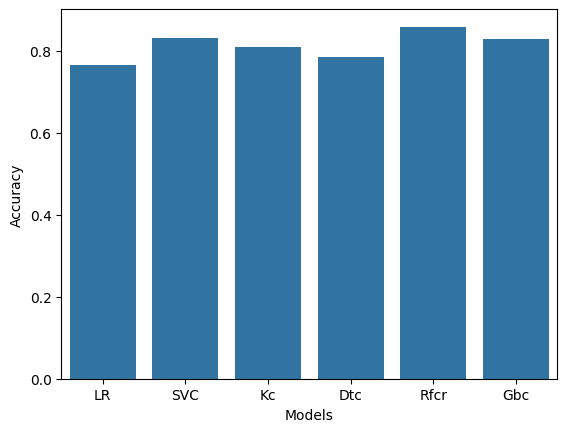

In [1061]:
import seaborn as sns
sns.barplot(x='Models', y='Accuracy', data=final_data)


In [1062]:
final_data = pd.DataFrame({
    'Models': [
        'LR',
        'SVC',
        'Kc',
        'Dtc',
        'Rfcr',
        'Gbc'
    ],
    'precision': [
        precision_score(y_test, y_pred1),
        precision_score(y_test, y_pred2),
        precision_score(y_test, y_pred3),
        precision_score(y_test, y_pred4),
        precision_score(y_test, y_pred5),
        precision_score(y_test, y_pred6)
    ]
})

In [1063]:
final_data

,Models,precision
0,LR,0.749536
1,SVC,0.822897
2,Kc,0.785714
3,Dtc,0.768993
4,Rfcr,0.856222
5,Gbc,0.825611


<Axes: xlabel='Models', ylabel='precision'>

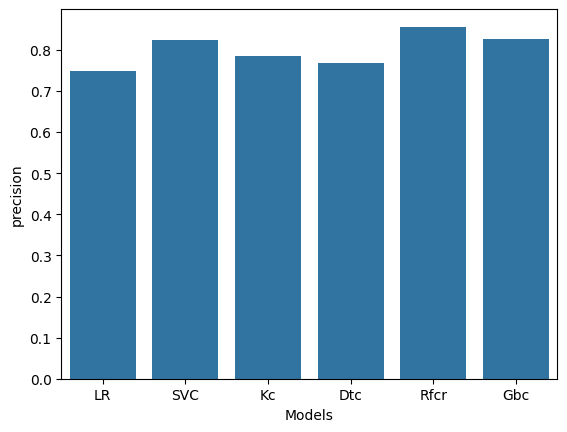

In [1064]:
sns.barplot(x='Models', y='precision', data=final_data)

In [1065]:
#save the model but the data scaler is also important as we need to do all on whole dataset after over sampling valeus saved in X_res and y_res

#If you're using resampled data (e.g., from SMOTE or other techniques), X_res should already be your balanced training set. So scaling should be applied to X_res, not X_train:

X_res = sc.fit_transform(X_res)
rf.fit( X_res, y_res)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
import joblib
joblib.dump(sc, 'scaler.pkl')  # Save after training
sc = joblib.load('scaler.pkl')  # Load during prediction

['churn_predict_model']

In [1067]:
model = joblib.load('churn_predict_model')

In [1068]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [1073]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1])

In [1078]:
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('churn_predict_model')
sc = joblib.load('scaler.pkl')  # Make sure you saved your StandardScaler as 'scaler.pkl'

st.title("🏦 Bank Customer Churn Prediction Using ML")

st.markdown("### Enter Customer Details")

# Input fields
credit_score = st.number_input("Credit Score", min_value=0)
age = st.number_input("Age", min_value=0)
tenure = st.number_input("Tenure", min_value=0)
balance = st.number_input("Balance", min_value=0.0)
num_of_products = st.number_input("Number of Products", min_value=0)
has_cr_card = st.selectbox("Has Credit Card?", ["No", "Yes"])
is_active_member = st.selectbox("Is Active Member?", ["No", "Yes"])
estimated_salary = st.number_input("Estimated Salary", min_value=0.0)
geography = st.selectbox("Geography", ["Germany", "Spain", "France"])
gender = st.selectbox("Gender", ["Male", "Female"])

# Encode categorical variables
Geography_Germany = 1 if geography == "Germany" else 0
Geography_Spain = 1 if geography == "Spain" else 0
# France is implicit: if both above are 0, it's France
Gender = 1 if gender == "Male" else 0
HasCrCard = 1 if has_cr_card == "Yes" else 0
IsActiveMember = 1 if is_active_member == "Yes" else 0

# Prediction
if st.button("Predict"):
    input_data = np.array([[credit_score, age, tenure, balance,
                            num_of_products, HasCrCard,
                            IsActiveMember, estimated_salary,
                            Geography_Germany, Geography_Spain, Gender]])
    
    input_scaled = sc.transform(input_data)
    result = model.predict(input_scaled)

    if result[0] == 0:
        st.success("✅ Customer is likely to stay.")
    else:
        st.error("⚠️ Customer is likely to churn.")


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'